<a href="https://colab.research.google.com/github/DannyTheFlower/PDA_Course/blob/main/pracitces/pracitce_1/PDA_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи

На первой практике вам предстоит поработать с реальными данными об истории экспертиз рабочих программ дисциплин в ИТМО.

**Задача:** сделать краткое исследование данных и построить 3 графика двумя способами. Первый способ - самостоятельно. Второй - с активной помощью ChatGPT. Порядок реализации способов значения не имеет. Библиотеки можно использовать любые.

**Цель:** оценить качество помощи ChatGPT для аналитики.

## Загрузка данных

Загрузим датасет в колаб, найти его также можно в папке [Data](https://drive.google.com/drive/folders/1NklhwWT6KVrtRF9GxnI-Z30QKNtNYae1?usp=share_link).

In [2]:
import pandas as pd

!gdown 1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8

Downloading...
From: https://drive.google.com/uc?id=1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8
To: /content/exp_stats.csv
100% 925k/925k [00:00<00:00, 160MB/s]


Посмотрим на данные.

In [27]:
data = pd.read_csv("/content/exp_stats.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   workprogram_id     7657 non-null   int64 
 1   user_count         7657 non-null   int64 
 2   expertise_status   7657 non-null   object
 3   expertise_counter  7657 non-null   int64 
 4   approval_date_y    7657 non-null   object
 5   title              7657 non-null   object
dtypes: int64(3), object(3)
memory usage: 359.0+ KB


Всего шесть столбцов, все без пропусков:
- `workprogram_id` - айди рабочей программы (РПД)
- `user_count` - сколько человек принимали участие в создании РПД
- `expertise_status` - на каком этапе экспертизы находится РПД (статус экспертизы: AC - одобрена, RE - на доработке, AR - в архиве, EX - на экспертизе, WK - в работе)
- `expertise_counter` - сколько раз РПД проходила экспертизу
- `approval_date` - день, когда РПД признали удовлетворяющей всем требованиям и разрешили ее реализовывать
- `title` - название дисциплины


In [28]:
data.head()

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
0,2626,4,AC,1,2022-05-06 14:23:17.924 +0200,Философия
1,8461,4,AC,1,2022-04-28 09:01:59.171 +0200,Философия
2,2627,3,AC,5,2021-08-31 20:51:19.142 +0200,Введение в цифровую культуру и программирование
3,2628,4,AC,0,2022-04-28 11:36:30.474 +0200,Проектирование баз данных
4,2631,4,AC,0,2022-04-28 12:06:31.165 +0200,Современные вопросы информатики


## Краткое исследование данных

В данных не слишком много столбцов и уже известно, что нет пустых ячеек. Теперь неплохо было бы погрузиться в них и ответить на 3 небольших вопроса:
1. Какой период охватывают данные в датасете?
2. Есть ли в данных нетипичные значения? Например, неположительные числа в столбце `user_count`. Или даты, которые сильно выбиваются из общего диапазона значений.
3. Есть ли нелогичные значения в данных? Например, статус РПД "в работе", но есть `approval_date`. Или статус "одоберно", но РПД 0 раз проходила экспертизу.



### Какой период охватывают данные в датасете?

In [29]:
# Предобработаем данные с датой: сделаем их формат datetime

data["approval_date_y"] = pd.to_datetime(data["approval_date_y"])

In [30]:
min_date = data["approval_date_y"].min()
max_date = data["approval_date_y"].max()
print(f"Период: с {min_date.strftime('%Y-%m-%d')} по {max_date.strftime('%Y-%m-%d')}")

Период: с 2021-04-21 по 2023-04-17


Период: с 2021-04-21 по 2023-04-17

### Есть ли в данных нетипичные значения?

In [31]:
data.describe()

,workprogram_id,user_count,expertise_counter
count,7657.000000,7657.000000,7657.000000
mean,15044.539768,3.386052,0.948936
std,6357.130608,2.066325,1.149317
min,2626.000000,1.000000,0.000000
25%,11000.000000,2.000000,0.000000
50%,15976.000000,3.000000,1.000000
75%,20048.000000,4.000000,1.000000
max,25081.000000,17.000000,10.000000


Нетипичные значения здесь — максимумы в столбцах `user_count` и `experise_counter`, поскольку 3 квантили этих столбцов заметно ниже максимальных значений. Примеры таких данных приведены ниже.

In [32]:
data[data["user_count"] == data["user_count"].max()]

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
2288,22664,17,AC,2,2023-01-10 13:06:51.293000+01:00,Эмоциональный интеллект
3934,14571,17,AC,3,2021-11-16 09:44:44.041000+01:00,Организация массовых мероприятий
3935,16092,17,AC,1,2022-05-12 16:59:00.764000+02:00,Организация массовых мероприятий


In [33]:
data[data["expertise_counter"] == data["expertise_counter"].max()]

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
10,2640,3,AC,10,2021-04-29 12:05:50.136000+02:00,Теория автоматического управления


Для анализа дат сгруппируем их по периодам (месяцы) и таким образом будем искать выбросы.

In [43]:
data["approval_year"] = data["approval_date_y"].apply(lambda x: x.year)
data["approval_month"] = data["approval_date_y"].apply(lambda x: x.month)
grouped_data = data.groupby(["approval_year", "approval_month"]).count()

max_activity = grouped_data[grouped_data["workprogram_id"] == grouped_data["workprogram_id"].max()]
min_activity = grouped_data[grouped_data["workprogram_id"] == grouped_data["workprogram_id"].min()]

In [44]:
max_activity

,,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
approval_year,approval_month,,,,,,
2022,4,2452,2452,2452,2452,2452,2452


In [45]:
min_activity

,,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
approval_year,approval_month,,,,,,
2023,4,14,14,14,14,14,14


Наибольшая активность была в апреле 2022 года (массовая загрузка программ), минимальная — в апреле 2023 года.

### Есть ли нелогичные значения в данных?

In [47]:
# Статус "в работе", но есть approval_date

anomalies_work_status = data[(data["expertise_status"] == "WK") & (data["approval_date_y"].notna())]
anomalies_work_status

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title,approval_year,approval_month
2618,10886,5,WK,1,2021-05-17 17:54:10.233000+02:00,Надежность технических систем и экологическая ...,2021,5
5093,17709,1,WK,0,2022-05-01 17:38:54.897000+02:00,Научно-исследовательская работа,2022,5
5094,17710,1,WK,0,2022-05-01 17:21:12.293000+02:00,"Производственная, преддипломная",2022,5
5095,17711,1,WK,0,2022-05-01 18:09:25.089000+02:00,Подготовка к защите и защита ВКР,2022,5


In [48]:
# Статус "одобрено", но РПД 0 раз проходила экспертизу
anomalies_approved_status = data[(data["expertise_status"] == "AC") & (data["expertise_counter"] == 0)]
anomalies_approved_status

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title,approval_year,approval_month
3,2628,4,AC,0,2022-04-28 11:36:30.474000+02:00,Проектирование баз данных,2022,4
4,2631,4,AC,0,2022-04-28 12:06:31.165000+02:00,Современные вопросы информатики,2022,4
18,19151,10,AC,0,2022-10-07 19:07:20.602000+02:00,Современные инструменты анализа данных,2022,10
22,22808,2,AC,0,2023-01-30 12:41:48.484000+01:00,Линейная алгебра,2023,1
23,2654,7,AC,0,2021-07-08 16:06:24.358000+02:00,Дискретная математика,2021,7
...,...,...,...,...,...,...,...,...
7650,24945,4,AC,0,2023-04-02 00:25:17.606000+02:00,Математические модели низкоразмерных систем,2023,4
7651,24946,4,AC,0,2023-04-02 00:25:29.275000+02:00,Методы моделирования многочастичных систем,2023,4
7652,24947,4,AC,0,2023-04-02 00:23:26.939000+02:00,Методы моделирования прикладных физических задач,2023,4
7655,24983,4,AC,0,2023-04-02 00:52:24.479000+02:00,Теория вероятностей,2023,4


Теперь ответьте на более интересные вопросы с использованием визуализаций.

### 1. Как распределяется количество редакторов рабочих программ на всем периоде наблюдений?

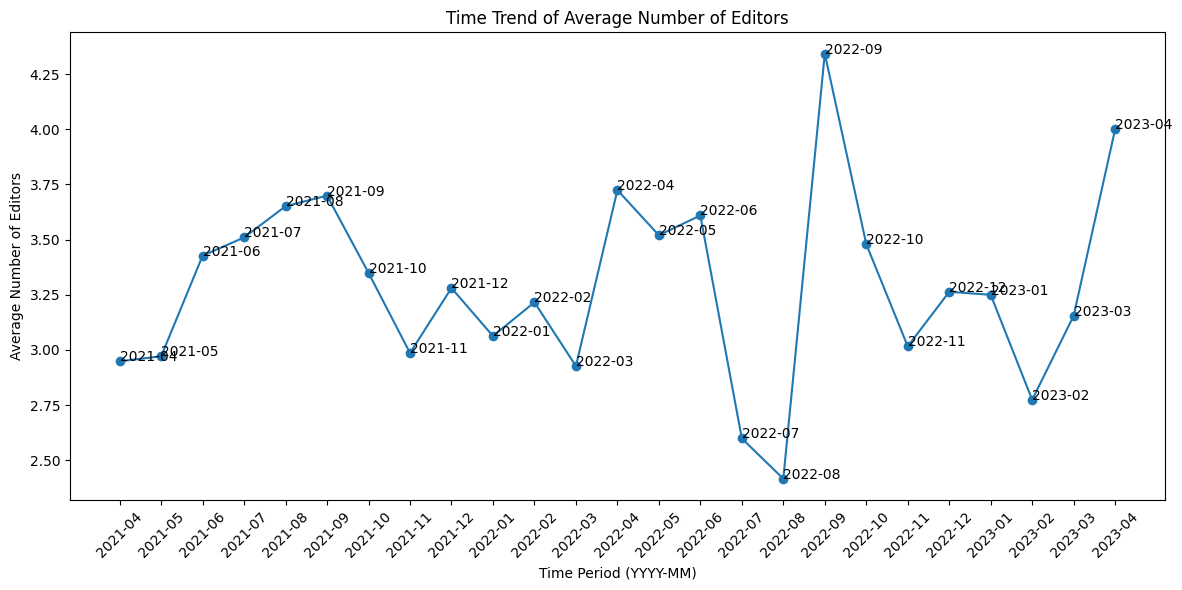

In [50]:
# Сгенерировано ChatGPT

import matplotlib.pyplot as plt

# Сгруппируем данные по месяцам и годам, вычислим среднее количество редакторов для каждого периода
grouped_by_time = data.groupby(['approval_year', 'approval_month'])['user_count'].mean().reset_index()

# Создадим столбец с периодами в формате 'ГГГГ-ММ' для легенды графика
grouped_by_time['period'] = grouped_by_time['approval_year'].astype(str) + '-' + grouped_by_time['approval_month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))

# Строим график
plt.plot(grouped_by_time['period'], grouped_by_time['user_count'], marker='o')

# Подписываем оси и добавляем заголовок
plt.xlabel('Time Period (YYYY-MM)')
plt.ylabel('Average Number of Editors')
plt.title('Time Trend of Average Number of Editors')

# Подписываем каждый период на графике
for i, txt in enumerate(grouped_by_time['period']):
    plt.annotate(txt, (grouped_by_time['period'][i], grouped_by_time['user_count'][i]))

plt.xticks(rotation=45)  # Поворачиваем подписи для удобства чтения
plt.tight_layout()  # Автоматическая корректировка расположения элементов на графике
plt.show()

### 2. Как со временем менялось среднее количество экспертиз РПД?

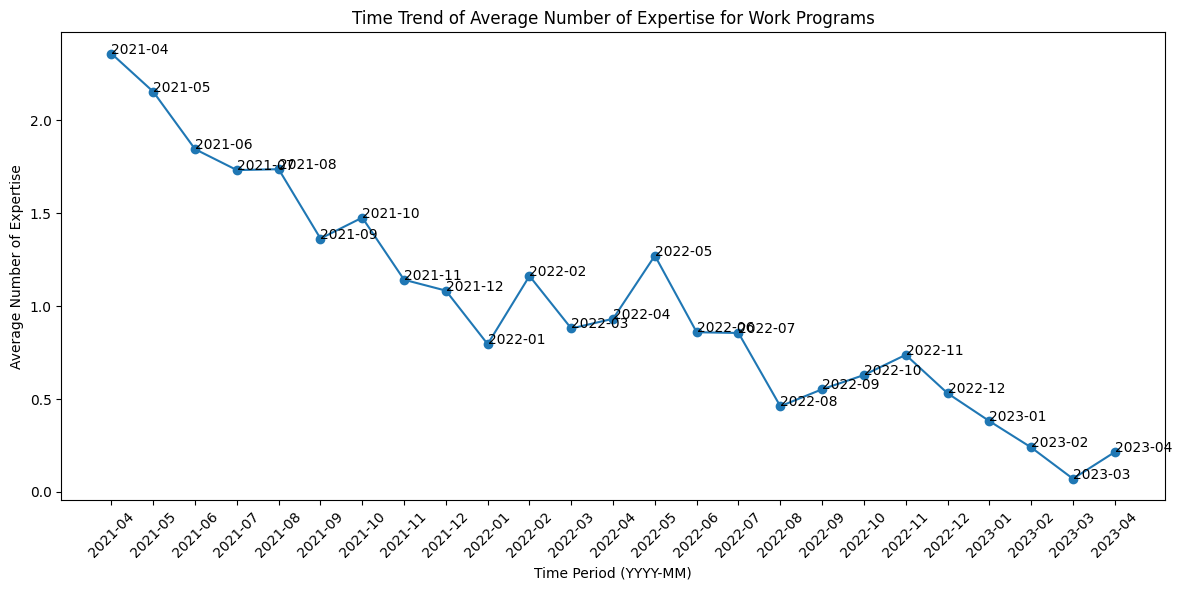

In [51]:
# ChatGPT

# Сгруппируем данные по месяцам и годам, вычислим среднее количество экспертиз для каждого периода
grouped_by_time_expertise = data.groupby(['approval_year', 'approval_month'])['expertise_counter'].mean().reset_index()

# Создадим столбец с периодами в формате 'ГГГГ-ММ' для легенды графика
grouped_by_time_expertise['period'] = grouped_by_time_expertise['approval_year'].astype(str) + '-' + grouped_by_time_expertise['approval_month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))

# Строим график
plt.plot(grouped_by_time_expertise['period'], grouped_by_time_expertise['expertise_counter'], marker='o', linestyle='-')

# Подписываем оси и добавляем заголовок
plt.xlabel('Time Period (YYYY-MM)')
plt.ylabel('Average Number of Expertise')
plt.title('Time Trend of Average Number of Expertise for Work Programs')

# Подписываем каждый период на графике
for i, txt in enumerate(grouped_by_time_expertise['period']):
    plt.annotate(txt, (grouped_by_time_expertise['period'][i], grouped_by_time_expertise['expertise_counter'][i]))

plt.xticks(rotation=45)  # Поворачиваем подписи для удобства чтения
plt.tight_layout()  # Автоматическая корректировка расположения элементов на графике
plt.show()

### 3. Есть ли зависимость между датой и присвоением статуса "одобрено" (AC)?

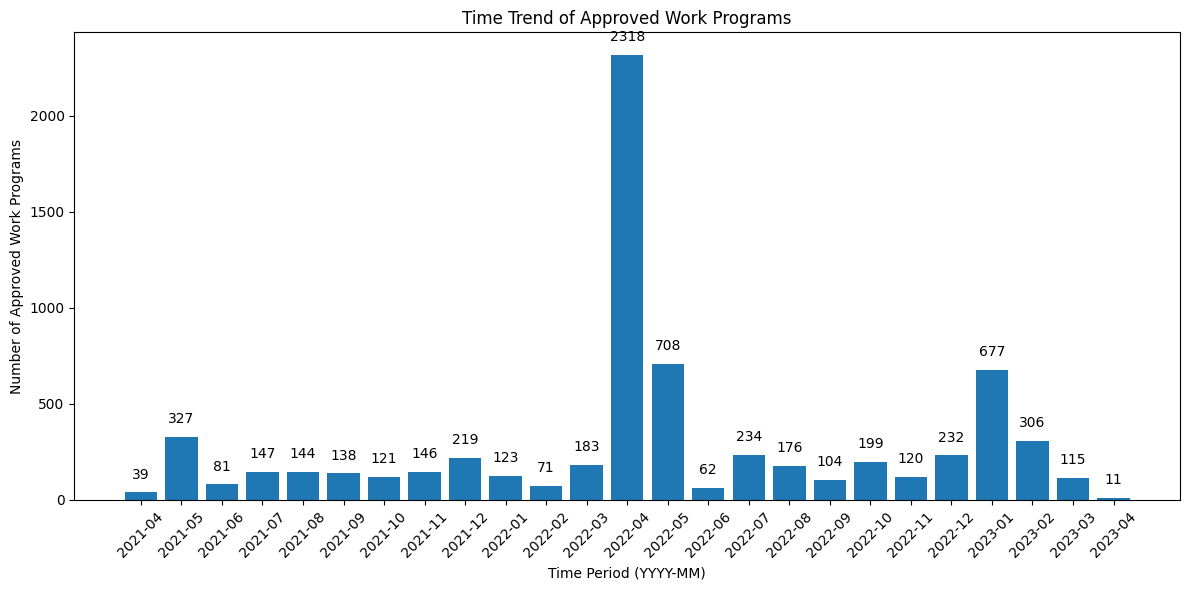

In [53]:
# ChatGPT

# Отфильтруем данные, чтобы оставить только РПД со статусом "одобрено"
approved_data = data[data['expertise_status'] == 'AC']

# Сгруппируем одобренные РПД по месяцам и годам, посчитаем их количество для каждого периода
grouped_by_time_approved = approved_data.groupby(['approval_year', 'approval_month']).size().reset_index(name='approved_count')

# Создадим столбец с периодами в формате 'ГГГГ-ММ' для легенды графика
grouped_by_time_approved['period'] = grouped_by_time_approved['approval_year'].astype(str) + '-' + grouped_by_time_approved['approval_month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
plt.bar(grouped_by_time_approved['period'], grouped_by_time_approved['approved_count'])

# Подписываем оси и добавляем заголовок
plt.xlabel('Time Period (YYYY-MM)')
plt.ylabel('Number of Approved Work Programs')
plt.title('Time Trend of Approved Work Programs')

# Подписываем каждый период на графике
for i, txt in enumerate(grouped_by_time_approved['approved_count']):
    plt.annotate(txt, (i, txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(rotation=45)  # Поворачиваем подписи для удобства чтения
plt.tight_layout()  # Автоматическая корректировка расположения элементов на графике
plt.show()
